## Оптимизация выполнения кода, векторизация, Numba

Материалы:
* Макрушин С.В. Лекция 3: Оптимизация выполнения кода, векторизация, Numba
* IPython Cookbook, Second Edition (2018), глава 4
* https://numba.pydata.org/numba-doc/latest/user/5minguide.html

## Задачи для совместного разбора

In [1]:
import numpy as np
import array
import random

1. Сгенерируйте массив `A` из `N=1млн` случайных целых чисел на отрезке от 0 до 1000. Пусть `B[i] = A[i] + 100`. Посчитайте среднее значение массива `B`.

In [2]:
def two_arrays_use_lists():
    a_list = [random.randint(0, 1001) for i in range(1000000)]
    b_list = [i+100 for i in a_list]
    sum_=0
    for i in b_list:
        sum_+=i
    return sum_/1000000
display("Олейников Александр")

'Олейников Александр'

In [3]:
%%timeit
two_arrays_use_lists()

713 ms ± 8.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%prun
two_arrays_use_lists()

In [5]:
def two_arrays_use_array():
    a_arr = array.array('l', [random.randint(0, 1001) for i in range(1000000)])
    b_arr = array.array('l', [i+100 for i in a_arr])
    return sum(b_arr)/1000000
display("Олейников Александр")

'Олейников Александр'

In [6]:
%%timeit
two_arrays_use_array()

734 ms ± 8.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%prun
two_arrays_use_array()

In [8]:
def two_arrays_use_np_array():
    a_arr = np.random.randint(1001, size=1000000)
    b_arr = a_arr+100
    return np.mean(b_arr)
display("Олейников Александр")

'Олейников Александр'

In [9]:
%%timeit
two_arrays_use_np_array()


7.19 ms ± 76.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%prun
two_arrays_use_np_array()

In [11]:
from numba import njit, jit

In [12]:
@njit
def two_arrays_use_lists():
    a_list = [random.randint(0, 1001) for i in range(1000000)]
    b_list = [i+100 for i in a_list]
    sum_=0
    for i in b_list:
        sum_+=i
    return sum_/1000000

display("Олейников Александр")

'Олейников Александр'

In [13]:
%%timeit
two_arrays_use_lists()

23.8 ms ± 885 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
a_arr = array.array('l', [random.randint(0, 1001) for i in range(1000000)])

@njit
def two_arrays_use_array(a_arr):
    b_arr = array.array('l', [i+100 for i in a_arr])
    return sum(b_arr)/1000000

In [15]:
%%timeit
two_arrays_use_array(a_arr) # Нельзя обработать array с помощью Numba

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUnknown attribute 'array' of type Module(<module 'array' (built-in)>)
[1m
File "C:\Users\Саня\AppData\Local\Temp\ipykernel_11412\1036669593.py", line 5:[0m
[1mdef two_arrays_use_array(a_arr):
[1m    b_arr = array.array('l', [i+100 for i in a_arr])
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: typing of get attribute at C:\Users\Саня\AppData\Local\Temp\ipykernel_11412\1036669593.py (5)[0m
[1m
File "C:\Users\Саня\AppData\Local\Temp\ipykernel_11412\1036669593.py", line 5:[0m
[1mdef two_arrays_use_array(a_arr):
[1m    b_arr = array.array('l', [i+100 for i in a_arr])
[0m    [1m^[0m[0m


In [ ]:
%%timeit
np.random.randint(1001, size=1000000)

In [ ]:
a_arr = np.random.randint(1001, size=1000000) # нельзя обработать np.random.randint, хотя random.randint можно)

@jit
def two_arrays_use_np_array(a_arr):
    b_arr = a_arr+100
    return np.mean(b_arr)
display("Олейников Александр")

In [ ]:
%%timeit
two_arrays_use_np_array(a_arr)

2. Создайте таблицу 2млн строк и с 4 столбцами, заполненными случайными числами. Добавьте столбец `key`, которые содержит элементы из множества английских букв. Выберите из таблицы подмножество строк, для которых в столбце `key` указаны первые 5 английских букв.

In [ ]:
import pandas as pd
import numpy as np
import string

df = pd.DataFrame(np.random.randint(1000, size=(2000000,4)), columns=['1', '2', '3', '4'])
df['key'] = np.random.choice(list(string.ascii_uppercase), size=len(df))
df_subset = df[df['key'].str.startswith('A') |
               df['key'].str.startswith('B') |
               df['key'].str.startswith('C') |
               df['key'].str.startswith('D') |
               df['key'].str.startswith('E')]
display(df_subset)
display("Олейников Александр")

## Лабораторная работа 3

In [2]:
import pandas as pd
import numpy as np
from numba import njit, jit

1. В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

Реализуйте несколько вариантов функции подсчета среднего значения столбца `rating` из таблицы `reviews` для отзывов, оставленных в 2010 году.

A. С использованием метода `DataFrame.iterrows` исходной таблицы;

Б. С использованием метода `DataFrame.iterrows` таблицы, в которой сохранены только отзывы за 2010 год;

В. С использованием метода `Series.mean`.

Проверьте, что результаты работы всех написанных функций корректны и совпадают. Измерьте выполнения всех написанных функций.


In [2]:
recipes = pd.read_csv('recipes_sample.csv', index_col='id',  parse_dates=['submitted'])
display(recipes.head())
recipes.info()

,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,
44123,george s at the cove black bean soup,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 44123 to 298512
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            30000 non-null  object        
 1   minutes         30000 non-null  int64         
 2   contributor_id  30000 non-null  int64         
 3   submitted       30000 non-null  datetime64[ns]
 4   n_steps         18810 non-null  float64       
 5   description     29377 non-null  object        
 6   n_ingredients   21120 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.8+ MB


In [3]:
reviews = pd.read_csv("reviews_sample.csv", index_col=0, parse_dates=['date'])
display(reviews.head())
reviews.info()

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 126696 entries, 370476 to 691207
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    126696 non-null  int64         
 1   recipe_id  126696 non-null  int64         
 2   date       126696 non-null  datetime64[ns]
 3   rating     126696 non-null  int64         
 4   review     126679 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.8+ MB


In [19]:
%%time
summa=0
count_rating=0
for i, row in reviews.iterrows():
    summa += row['rating']
    count_rating += 1
print(summa/count_rating)
print("Олейников Александр")

4.410802235271832
Олейников Александр
CPU times: total: 8.78 s
Wall time: 8.97 s


In [6]:
data = reviews[(reviews.date > '2010-01-01') & (reviews.date < '2010-12-31')]

In [21]:
%%time
summa=0
count_rating=0
for i, row in data.iterrows():
    summa += row['rating']
    count_rating += 1
print(summa/count_rating)
print("Олейников Александр")

4.455265571583424
Олейников Александр
CPU times: total: 781 ms
Wall time: 811 ms


In [24]:
%time
reviews.rating.mean()
print("Олейников Александр")

CPU times: total: 0 ns
Wall time: 0 ns
Олейников Александр


2. Какая из созданных функций выполняется медленнее? Что наиболее сильно влияет на скорость выполнения? Для ответа использовать профайлер `line_profiler`. Сохраните результаты работы профайлера в отдельную текстовую ячейку и прокомментируйте результаты его работы.

(*). Сможете ли вы ускорить работу функции 1Б, отказавшись от использования метода `iterrows`, но не используя метод `mean`?

In [8]:
%%time
print(data['rating'].sum() / len(data))
print("Олейников Александр")

4.455265571583424
Олейников Александр
CPU times: total: 0 ns
Wall time: 0 ns


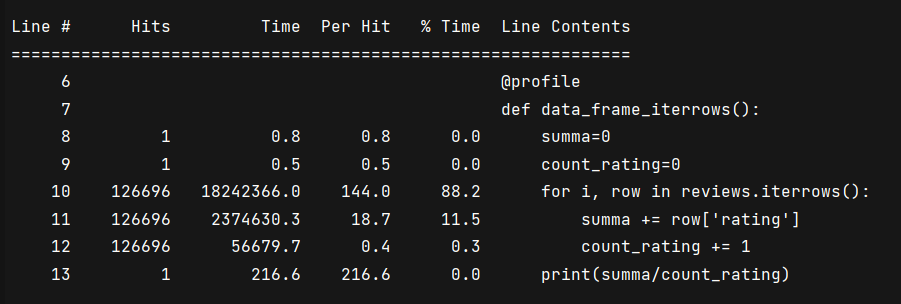

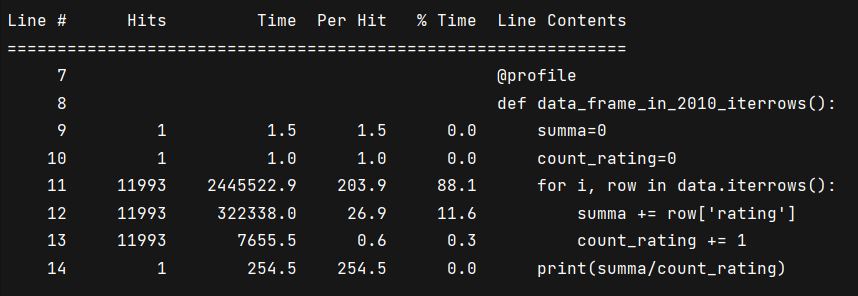

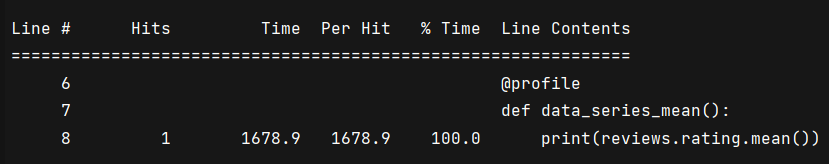

3. Вам предлагается воспользоваться функцией, которая собирает статистику о том, сколько отзывов содержат то или иное слово. Измерьте время выполнения этой функции. Сможете ли вы найти узкие места в коде, используя профайлер? Выпишите (словами), что в имеющемся коде реализовано неоптимально. Оптимизируйте функцию и добейтесь значительного (как минимум, на один порядок) прироста в скорости выполнения.

In [4]:
def get_word_reviews_count(df):
    word_reviews = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)
        print(word_reviews)
        break
    
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        review = row['review']
        words = review.split(' ')
        for word in words:
            word_reviews_count[word] = len(word_reviews[word])
        break
    return word_reviews_count

In [5]:
print(get_word_reviews_count(reviews))

{'Last': [57993], 'week': [57993], 'whole': [57993], 'sides': [57993], 'of': [57993, 57993, 57993, 57993], 'frozen': [57993], 'salmon': [57993, 57993, 57993, 57993], 'fillet': [57993], 'was': [57993, 57993], 'on': [57993, 57993], 'sale': [57993], 'in': [57993], 'my': [57993], 'local': [57993], 'supermarket,': [57993], 'so': [57993, 57993], 'I': [57993, 57993, 57993], 'bought': [57993], 'tons': [57993], '(okay,': [57993], 'only': [57993], '3,': [57993], 'but': [57993, 57993], 'total': [57993], 'weight': [57993], 'over': [57993], '10': [57993], 'pounds).': [57993], '': [57993, 57993, 57993, 57993], 'This': [57993], 'recipe': [57993], 'is': [57993], 'perfect': [57993], 'for': [57993, 57993, 57993], 'fillet,': [57993], 'even': [57993], 'though': [57993], 'it': [57993], 'calls': [57993], 'steaks.': [57993], 'cut': [57993], 'up': [57993], 'the': [57993, 57993, 57993, 57993, 57993], 'into': [57993], 'individual': [57993], 'portions': [57993], 'and': [57993, 57993], 'followed': [57993], 'instr

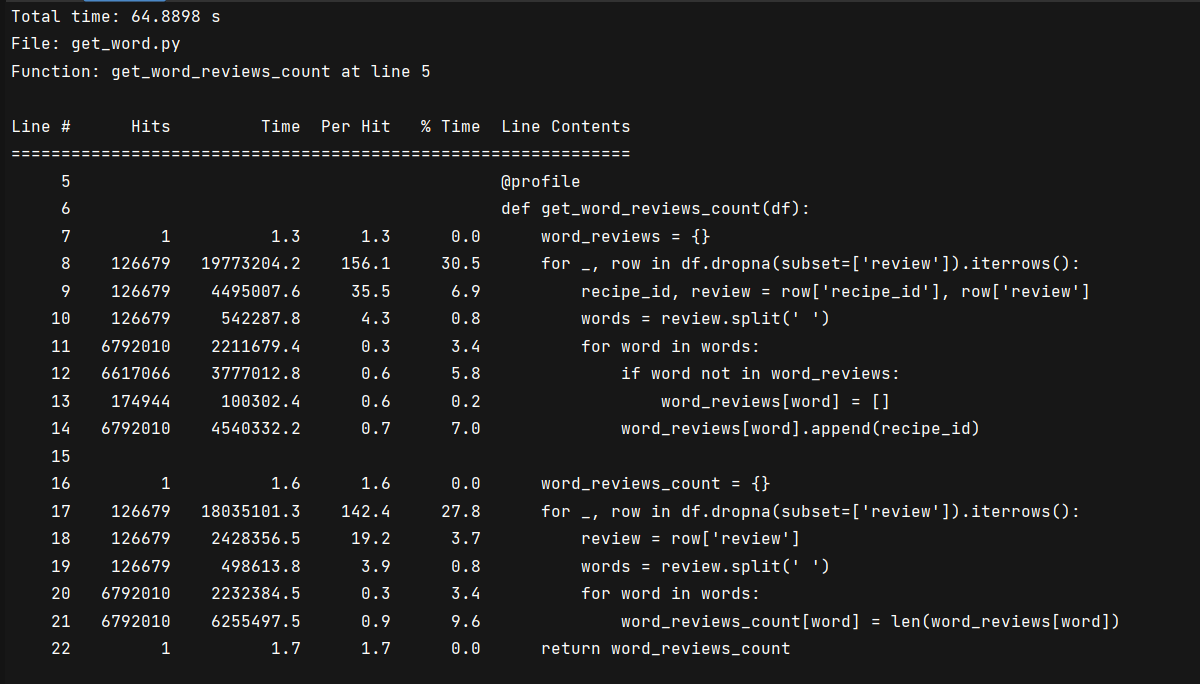

1. Повторная реализация df.dropna
2. dropna ко всему df
3. for к пандасу
4. Неуместное использование списков и словарей

In [19]:
def new_get_word_reviews_count(df):
    from collections import Counter
    return Counter(reviews['review'].dropna().to_string(header=False, index=False).split())

In [20]:
%%time
new_get_word_reviews_count(reviews)
print("Александр Олейников")

Александр Олейников
CPU times: total: 938 ms
Wall time: 946 ms


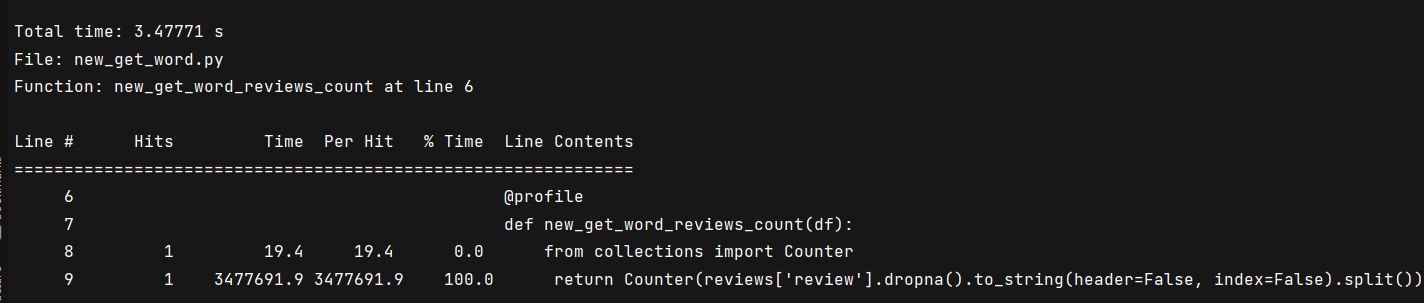

4. Напишите несколько версий функции `MAPE` (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от среднего значения рейтинга по всем отзывам для этого рецепта. 
    1. Без использования векторизованных операций и методов массивов `numpy` и без использования `numba`
    2. Без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`
    3. С использованием векторизованных операций и методов массивов `numpy`, но без использования `numba`
    4. C использованием векторизованных операций и методов массивов `numpy` и `numba`
    
Измерьте время выполнения каждой из реализаций.

Замечание: удалите из выборки отзывы с нулевым рейтингом.


In [35]:
data = reviews[reviews["rating"] != 0].rating.dropna().to_numpy()
data

array([5, 5, 4, ..., 5, 5, 5], dtype=int64)

In [36]:
def mape_a(data):
    summa = 0
    length = 0
    for i in data:
        summa += i
        length += 1
    F = summa/length
    summa = 0
    for i in data:
        summa += abs((i-F)/i)
    return summa/length*100

In [37]:
%%timeit
mape_a(data)

103 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
from numba import njit, jit

@njit
def mape_b(data):
    summa = 0
    length = 0
    for i in data:
        summa += i
        length += 1
    F = summa/length
    summa = 0
    for i in data:
        summa += abs((i-F)/i)
    return summa/length*100

In [17]:
%%timeit
mape_b(data)
display("Олейников Александр")

383 µs ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Олейников Александр

In [32]:
mean = data.mean()
def mape_c_a(value):
    return abs((value-mean)/value)

In [33]:
vmape_c = np.vectorize(mape_c_a)

In [34]:
%%timeit 
np.sum(vmape_c(data))/len(vmape_c(data))*100

127 ms ± 6.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
def mape_c(data):
    new_data = (abs(data - np.mean(data)))/data
    return new_data.sum()/data.size*100

In [53]:
%%timeit
mape_c(data)

614 µs ± 59.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
from numba import vectorize
mean = data.mean()
@vectorize(['float64(float64)'])
def mape_d(value):
    return abs((value-mean)/value)


In [27]:
%%timeit
np.sum(mape_d(data))/len(mape_d(data))*100
display("Олейников Александр")

459 µs ± 69.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Олейников Александр